TASK - 1

In [6]:
import pandas as pd
data = pd.read_csv('/content/Daily_Public_Transport_Passenger_Boardings_By_Ticket_Type_20240513.csv')
data.head()

,Date,MyWay,Paper Ticket
0,01/07/2019,66215,4325
1,15/09/2023,63800,7349
2,28/12/2021,9994,1882
3,11/01/2023,43769,3991
4,11/09/2021,3810,685


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1778 entries, 0 to 1777
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          1778 non-null   object
 1   MyWay         1778 non-null   int64 
 2   Paper Ticket  1778 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 41.8+ KB


In [8]:
data.isnull().sum()

Date            0
MyWay           0
Paper Ticket    0
dtype: int64

In [9]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

start_date = '2023-04-01'
end_date = '2024-04-01'

filtered_data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]

filtered_data.head(100)

,Date,MyWay,Paper Ticket
1,2023-09-15,63800,7349
10,2023-08-29,69155,6507
19,2023-04-11,50246,4306
27,2023-09-17,19207,2368
33,2023-10-07,24249,3089
...,...,...,...
492,2023-07-11,49793,4207
493,2023-12-30,18428,2671
510,2023-05-12,65082,7160
512,2023-08-27,17096,1885


In [10]:
from google.colab import files
filtered_data.to_csv('filtered_data.csv', index=False)
files.download('filtered_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
data2 = pd.read_csv('/content/filtered_data.csv')
data2.head()


,Date,MyWay,Paper Ticket
0,2023-09-15,63800,7349
1,2023-08-29,69155,6507
2,2023-04-11,50246,4306
3,2023-09-17,19207,2368
4,2023-10-07,24249,3089


In [12]:
data2.shape

(367, 3)

<Figure size 1200x600 with 0 Axes>

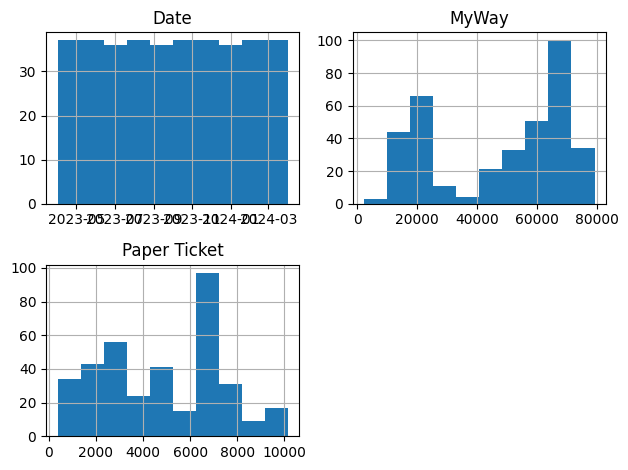

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
filtered_data.hist()
plt.tight_layout()
plt.show()


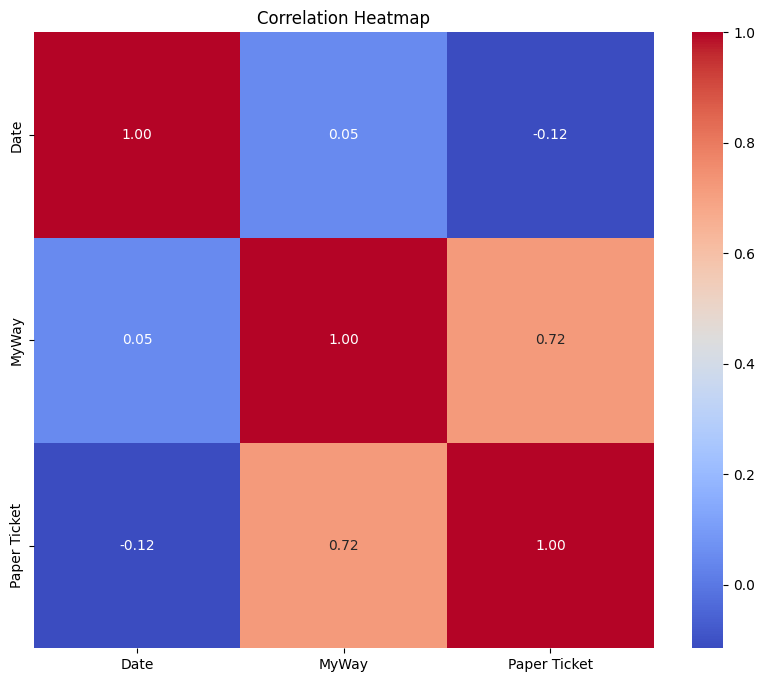

In [16]:
import seaborn as sns
correlation_matrix = filtered_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


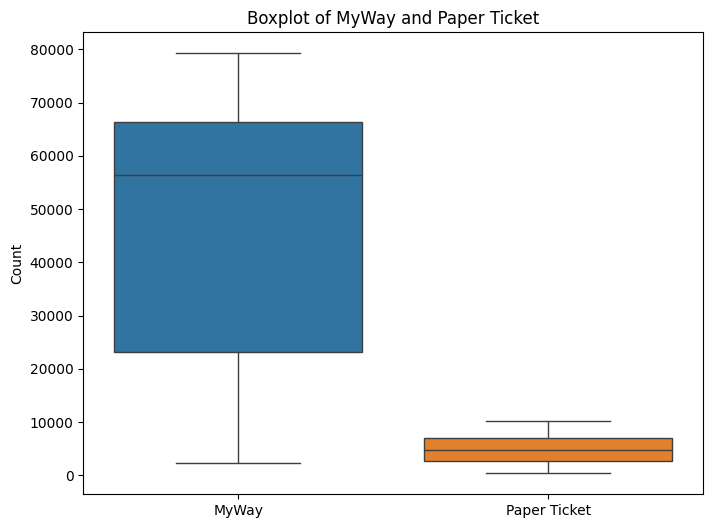

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=filtered_data[['MyWay', 'Paper Ticket']])
plt.title('Boxplot of MyWay and Paper Ticket')
plt.ylabel('Count')
plt.show()


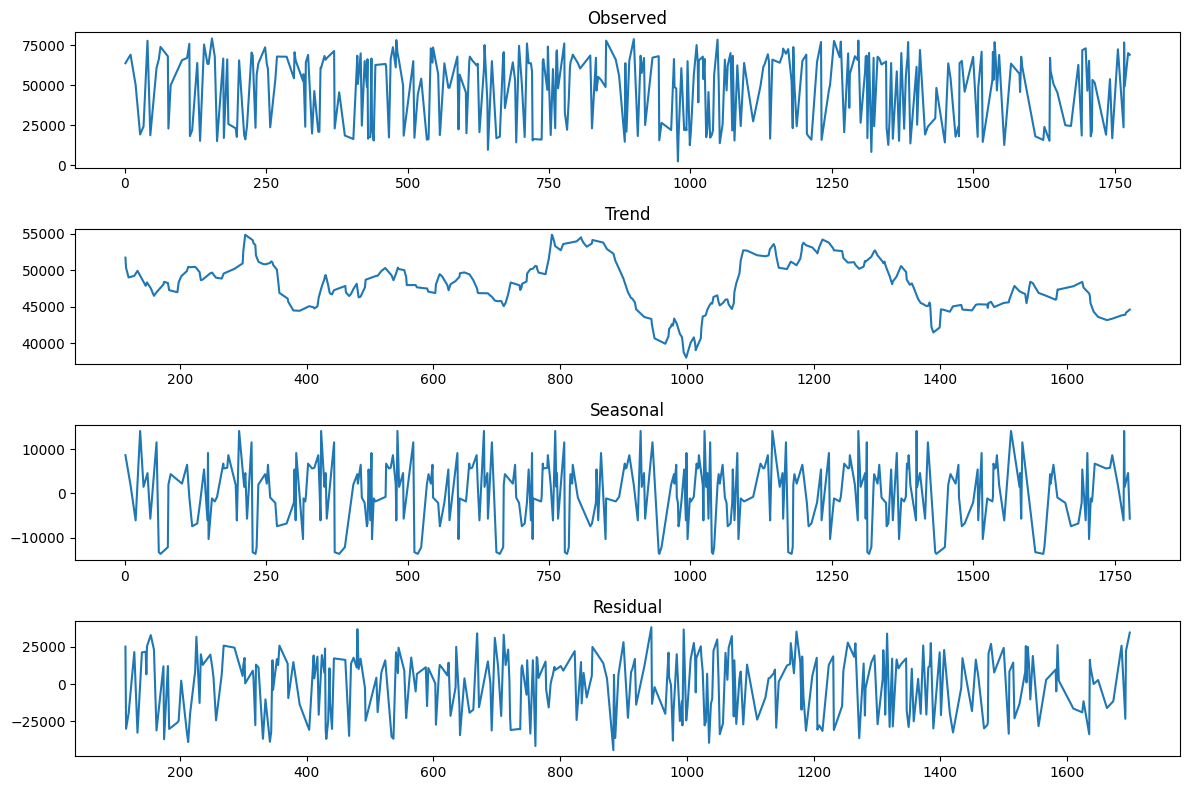

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(filtered_data['MyWay'], model='additive', period=30)

plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(result.observed)
plt.title('Observed')

plt.subplot(4, 1, 2)
plt.plot(result.trend)
plt.title('Trend')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal)
plt.title('Seasonal')

plt.subplot(4, 1, 4)
plt.plot(result.resid)
plt.title('Residual')

plt.tight_layout()
plt.show()


TASK - 2

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta

filtered_data['Date'] = pd.to_datetime(filtered_data['Date'], format='%Y-%m-%d')

filtered_data['Year'] = filtered_data['Date'].dt.year
filtered_data['Month'] = filtered_data['Date'].dt.month
filtered_data['Day'] = filtered_data['Date'].dt.day
filtered_data['DayOfWeek'] = filtered_data['Date'].dt.dayofweek

X = filtered_data[['Year', 'Month', 'Day', 'DayOfWeek']].values
y = filtered_data['MyWay'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

start_date = datetime(2024, 5, 1)
end_date = datetime(2024, 5, 7)
next_7_days = [start_date + timedelta(days=i) for i in range(7)]
next_7_days_features = pd.DataFrame({
    'Year': [date.year for date in next_7_days],
    'Month': [date.month for date in next_7_days],
    'Day': [date.day for date in next_7_days],
    'DayOfWeek': [date.weekday() for date in next_7_days]
})

predicted_values = model.predict(next_7_days_features.values)

for date, value in zip(next_7_days, predicted_values):
    print(f"{date.strftime('%Y-%m-%d')}: Predicted MyWay value = {value}")


2024-05-01: Predicted MyWay value = 78559.70967741936
2024-05-02: Predicted MyWay value = 62809.67741935485
2024-05-03: Predicted MyWay value = 47059.645161290326
2024-05-04: Predicted MyWay value = 31309.612903225803
2024-05-05: Predicted MyWay value = 15559.580645161273
2024-05-06: Predicted MyWay value = 78614.51612903227
2024-05-07: Predicted MyWay value = 62864.48387096774


<ipython-input-24-88979ccbcb9d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Date'] = pd.to_datetime(filtered_data['Date'], format='%Y-%m-%d')
<ipython-input-24-88979ccbcb9d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Year'] = filtered_data['Date'].dt.year
<ipython-input-24-88979ccbcb9d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [23]:
print('Required Output')
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

start_date = '2024-05-01'
end_date = '2024-05-07'

filtered_data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]

filtered_data.head(7)

Required Output


,Date,MyWay,Paper Ticket
783,2024-05-03,70261,9831
875,2024-05-05,16352,2099
1123,2024-05-06,68768,9820
1293,2024-05-07,72711,9721
1302,2024-05-04,24412,3201
1421,2024-05-01,74611,9863
1482,2024-05-02,73656,9483
